# Follow up
#### This is a follow up on 01 Python workflow to continue and use the knowledge

In [1]:
# Importing
import torch as pt
import matplotlib.pyplot as plt
from torch import nn

In [2]:
# Setting up device
device = "cuda" if pt.cuda.is_available() else "cpu"
print(device)

cpu


#### Prepare data

In [35]:
# Create the known parameters
weight = -9 # k
bias = 18 # m


# Create the data
x = pt.linspace(0, 1, 50)
y = weight*x+bias

x_train = x[:40]
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]

tensor([106.5306, 104.6939, 102.8571, 101.0204,  99.1837,  97.3469,  95.5102,
         93.6735,  91.8367,  90.0000])

#### Creating a plot tool

In [4]:
def plotter(y_preds = None):
    if y_preds != None:
        plt.scatter(x_test, y_preds, label="Training")
    plt.plot(x_test, y_test)
    plt.plot(x_train, y_train, label="Testing")
    plt.legend()
    plt.show()

#### Creating a model class

In [27]:
class Linear_regression_model_2(nn.Module): # imports the module
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1) 
    def forward(self, x: pt.Tensor) -> pt.Tensor:
        return self.linear_layer(x)

#### Create the model

In [28]:
pt.manual_seed(8848)
model_0_1 = Linear_regression_model_2()

print(model_0_1.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.3984]])), ('linear_layer.bias', tensor([-0.9504]))])


#### Loss func and optimizer

In [29]:
loss_fn = nn.L1Loss()

optimizer = pt.optim.SGD(params=model_0_1.parameters(), lr=0.01)

#### Train loop

In [30]:
epochs = 100

# Track different values
epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    # enter train mode
    model_0_1.train()

    y_preds = model_0_1(x_train)

    loss = loss_fn(y_preds, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0_1.eval()


    with pt.inference_mode():
        test_pred = model_0_1(x_test)
        loss_test = loss_fn(test_pred, y_test)
    test_loss_values.append(loss_test)
    train_loss_values.append(loss)
    epoch_count.append(epoch)
print(f"loss: {loss}, loss test: {loss_test}")
print(f"state: {model_0_1.state_dict()}")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x40 and 1x1)

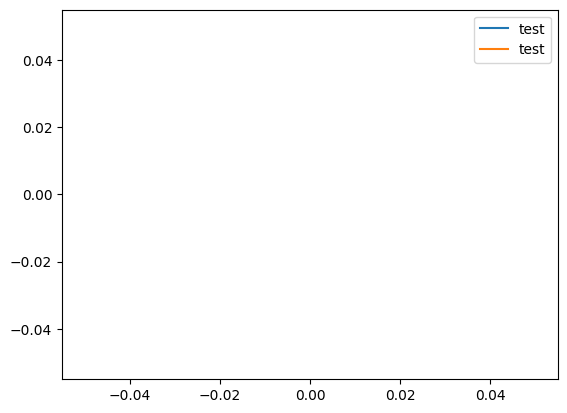

In [31]:
# loss graph
with pt.inference_mode():
    #print(type(test_loss_values), type(epoch_count))
    plt.plot(epoch_count, test_loss_values, label="test")
    plt.plot(epoch_count,train_loss_values, label="test")
    plt.legend()
    plt.show()

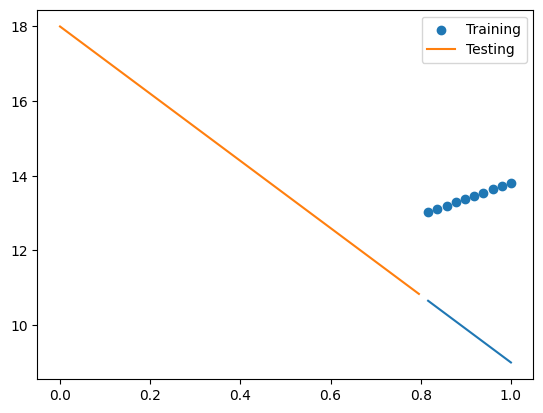

In [10]:

with pt.inference_mode():
    test_pred = model_0_1(x_test)
plotter(test_pred)

In [12]:
model_0_1.state_dict()

OrderedDict([('weight', tensor([4.2975])), ('bias', tensor([9.5148]))])

#### Save and load model

In [38]:
# Save model
from sys import path
name = "01_putting_together_model"
pt.save(model_0_1.state_dict(), f=(f"{path[0]}\models\{name}"))


In [15]:
# Load model
from sys import path
name = "01_putting_together_model"
loaded_model = Linear_regresion_model_2()
loaded_model.load_state_dict(pt.load(f=(f"{path[0]}\models\{name}")))


<All keys matched successfully>

##### Comparing

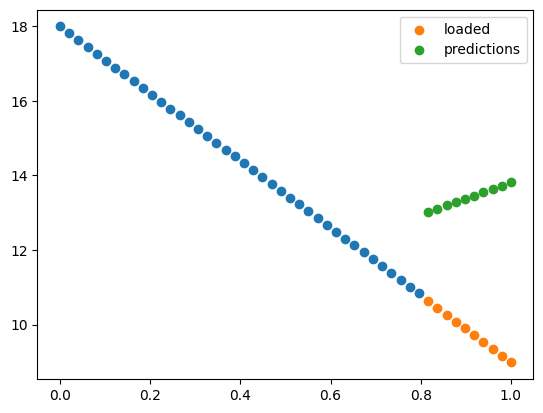

In [16]:
with pt.inference_mode():
    loaded_prediction_y = loaded_model(x_test)
    prediction_y = model_0_1(x_test)
plt.scatter(x_train,y_train)
plt.scatter(x_test, loaded_prediction_y, label="loaded")
plt.scatter(x_test, prediction_y, label="predictions")
plt.legend()
plt.show()
